In [1]:
#initializing
list_of_Trainloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
N_list_2=[]

In [182]:
N_list=[4000,3600,3200,2800,2400,2000,1600,1200,800,400]
N_list_2.append(N_list[len(N_list_2)])
# number of data
N=N_list_2[-1]
print(N)

400


In [183]:

import matplotlib.pyplot as plt
import numpy as np
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


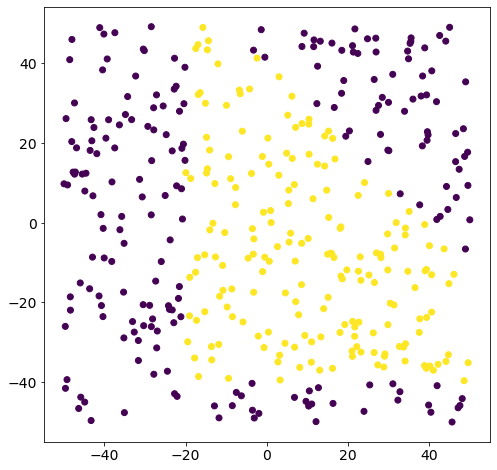

In [184]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)

for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [185]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 400
train: 320


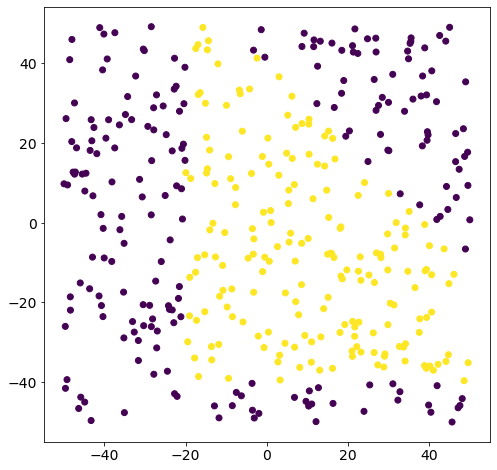

In [186]:
#keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

#dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [187]:
(x_train, y_train) = (x[0:N_train] , y[0:N_train])
(x_valid, y_valid) = (x[N_train:] , y[N_train:])
print('Train:',len(x_train),'\t Validation:',len(x_valid))

Train: 320 	 Validation: 80


In [188]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [189]:
print((x_train[:,0]).max())


1.7431642564892464


In [190]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 2)                 6         
                                                                 
 dense_73 (Dense)            (None, 25)                75        
                                                                 
 dense_74 (Dense)            (None, 25)                650       
                                                                 
 dense_75 (Dense)            (None, 25)                650       
                                                                 
 dense_76 (Dense)            (None, 25)                650       
                                                                 
 dense_77 (Dense)            (None, 25)                650       
                                                                 
 dense_78 (Dense)            (None, 25)               

In [191]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='adam',
               metrics=['accuracy'])

In [192]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
4/4 - 1s - loss: 0.6826 - accuracy: 0.5719 - val_loss: 0.6643 - val_accuracy: 0.6500 - 733ms/epoch - 183ms/step
Epoch 2/500
4/4 - 0s - loss: 0.6654 - accuracy: 0.6031 - val_loss: 0.6494 - val_accuracy: 0.6375 - 45ms/epoch - 11ms/step
Epoch 3/500
4/4 - 0s - loss: 0.6566 - accuracy: 0.5938 - val_loss: 0.6337 - val_accuracy: 0.6250 - 44ms/epoch - 11ms/step
Epoch 4/500
4/4 - 0s - loss: 0.6552 - accuracy: 0.6156 - val_loss: 0.6179 - val_accuracy: 0.6250 - 42ms/epoch - 10ms/step
Epoch 5/500
4/4 - 0s - loss: 0.6360 - accuracy: 0.6000 - val_loss: 0.6006 - val_accuracy: 0.6375 - 35ms/epoch - 9ms/step
Epoch 6/500
4/4 - 0s - loss: 0.6365 - accuracy: 0.6219 - val_loss: 0.5844 - val_accuracy: 0.6500 - 44ms/epoch - 11ms/step
Epoch 7/500
4/4 - 0s - loss: 0.6158 - accuracy: 0.6531 - val_loss: 0.5640 - val_accuracy: 0.6625 - 35ms/epoch - 9ms/step
Epoch 8/500
4/4 - 0s - loss: 0.6030 - accuracy: 0.6812 - val_loss: 0.5403 - val_accuracy: 0.7000 - 40ms/epoch - 10ms/step
Epoch 9/500
4/4 - 0s - l

4/4 - 0s - loss: 0.1301 - accuracy: 0.9625 - val_loss: 0.1378 - val_accuracy: 0.9250 - 33ms/epoch - 8ms/step
Epoch 69/500
4/4 - 0s - loss: 0.1141 - accuracy: 0.9531 - val_loss: 0.0988 - val_accuracy: 0.9750 - 41ms/epoch - 10ms/step
Epoch 70/500
4/4 - 0s - loss: 0.1227 - accuracy: 0.9531 - val_loss: 0.1353 - val_accuracy: 0.9500 - 37ms/epoch - 9ms/step
Epoch 71/500
4/4 - 0s - loss: 0.1073 - accuracy: 0.9594 - val_loss: 0.1291 - val_accuracy: 0.9500 - 39ms/epoch - 10ms/step
Epoch 72/500
4/4 - 0s - loss: 0.1045 - accuracy: 0.9594 - val_loss: 0.1599 - val_accuracy: 0.9000 - 35ms/epoch - 9ms/step
Epoch 73/500
4/4 - 0s - loss: 0.1068 - accuracy: 0.9625 - val_loss: 0.1070 - val_accuracy: 0.9500 - 37ms/epoch - 9ms/step
Epoch 74/500
4/4 - 0s - loss: 0.1086 - accuracy: 0.9563 - val_loss: 0.1311 - val_accuracy: 0.9250 - 38ms/epoch - 9ms/step
Epoch 75/500
4/4 - 0s - loss: 0.1211 - accuracy: 0.9531 - val_loss: 0.1105 - val_accuracy: 0.9750 - 37ms/epoch - 9ms/step
Epoch 76/500
4/4 - 0s - loss: 0.103

Epoch 135/500
4/4 - 0s - loss: 0.0527 - accuracy: 0.9812 - val_loss: 0.0963 - val_accuracy: 0.9375 - 41ms/epoch - 10ms/step
Epoch 136/500
4/4 - 0s - loss: 0.0577 - accuracy: 0.9781 - val_loss: 0.0886 - val_accuracy: 0.9625 - 37ms/epoch - 9ms/step
Epoch 137/500
4/4 - 0s - loss: 0.0505 - accuracy: 0.9875 - val_loss: 0.0930 - val_accuracy: 0.9500 - 39ms/epoch - 10ms/step
Epoch 138/500
4/4 - 0s - loss: 0.0663 - accuracy: 0.9719 - val_loss: 0.1057 - val_accuracy: 0.9375 - 35ms/epoch - 9ms/step
Epoch 139/500
4/4 - 0s - loss: 0.0655 - accuracy: 0.9750 - val_loss: 0.0939 - val_accuracy: 0.9375 - 39ms/epoch - 10ms/step
Epoch 140/500
4/4 - 0s - loss: 0.0538 - accuracy: 0.9844 - val_loss: 0.1227 - val_accuracy: 0.9375 - 37ms/epoch - 9ms/step
Epoch 141/500
4/4 - 0s - loss: 0.0547 - accuracy: 0.9812 - val_loss: 0.0965 - val_accuracy: 0.9625 - 34ms/epoch - 9ms/step
Epoch 142/500
4/4 - 0s - loss: 0.0608 - accuracy: 0.9656 - val_loss: 0.1051 - val_accuracy: 0.9500 - 40ms/epoch - 10ms/step
Epoch 143/50

Epoch 202/500
4/4 - 0s - loss: 0.0514 - accuracy: 0.9812 - val_loss: 0.0950 - val_accuracy: 0.9625 - 38ms/epoch - 9ms/step
Epoch 203/500
4/4 - 0s - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0610 - val_accuracy: 0.9750 - 35ms/epoch - 9ms/step
Epoch 204/500
4/4 - 0s - loss: 0.0453 - accuracy: 0.9844 - val_loss: 0.1190 - val_accuracy: 0.9500 - 34ms/epoch - 9ms/step
Epoch 205/500
4/4 - 0s - loss: 0.0464 - accuracy: 0.9750 - val_loss: 0.0693 - val_accuracy: 0.9500 - 39ms/epoch - 10ms/step
Epoch 206/500
4/4 - 0s - loss: 0.0373 - accuracy: 0.9906 - val_loss: 0.1036 - val_accuracy: 0.9250 - 38ms/epoch - 10ms/step
Epoch 207/500
4/4 - 0s - loss: 0.0401 - accuracy: 0.9781 - val_loss: 0.0825 - val_accuracy: 0.9750 - 31ms/epoch - 8ms/step
Epoch 208/500
4/4 - 0s - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.0727 - val_accuracy: 0.9750 - 38ms/epoch - 9ms/step
Epoch 209/500
4/4 - 0s - loss: 0.0412 - accuracy: 0.9844 - val_loss: 0.1159 - val_accuracy: 0.9500 - 38ms/epoch - 10ms/step
Epoch 210/500

Epoch 269/500
4/4 - 0s - loss: 0.0371 - accuracy: 0.9844 - val_loss: 0.0842 - val_accuracy: 0.9500 - 38ms/epoch - 9ms/step
Epoch 270/500
4/4 - 0s - loss: 0.0393 - accuracy: 0.9844 - val_loss: 0.0843 - val_accuracy: 0.9500 - 41ms/epoch - 10ms/step
Epoch 271/500
4/4 - 0s - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9875 - 35ms/epoch - 9ms/step
Epoch 272/500
4/4 - 0s - loss: 0.0295 - accuracy: 0.9875 - val_loss: 0.1055 - val_accuracy: 0.9375 - 40ms/epoch - 10ms/step
Epoch 273/500
4/4 - 0s - loss: 0.0354 - accuracy: 0.9844 - val_loss: 0.0444 - val_accuracy: 0.9875 - 36ms/epoch - 9ms/step
Epoch 274/500
4/4 - 0s - loss: 0.0475 - accuracy: 0.9812 - val_loss: 0.0579 - val_accuracy: 0.9750 - 36ms/epoch - 9ms/step
Epoch 275/500
4/4 - 0s - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.1546 - val_accuracy: 0.9375 - 35ms/epoch - 9ms/step
Epoch 276/500
4/4 - 0s - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0485 - val_accuracy: 0.9875 - 32ms/epoch - 8ms/step
Epoch 277/500


Epoch 336/500
4/4 - 0s - loss: 0.0294 - accuracy: 0.9875 - val_loss: 0.0424 - val_accuracy: 0.9875 - 45ms/epoch - 11ms/step
Epoch 337/500
4/4 - 0s - loss: 0.0330 - accuracy: 0.9844 - val_loss: 0.0680 - val_accuracy: 0.9625 - 46ms/epoch - 12ms/step
Epoch 338/500
4/4 - 0s - loss: 0.0262 - accuracy: 0.9875 - val_loss: 0.0983 - val_accuracy: 0.9500 - 50ms/epoch - 13ms/step
Epoch 339/500
4/4 - 0s - loss: 0.0297 - accuracy: 0.9844 - val_loss: 0.0692 - val_accuracy: 0.9625 - 50ms/epoch - 13ms/step
Epoch 340/500
4/4 - 0s - loss: 0.0450 - accuracy: 0.9719 - val_loss: 0.0811 - val_accuracy: 0.9625 - 46ms/epoch - 11ms/step
Epoch 341/500
4/4 - 0s - loss: 0.0272 - accuracy: 0.9875 - val_loss: 0.0928 - val_accuracy: 0.9500 - 42ms/epoch - 10ms/step
Epoch 342/500
4/4 - 0s - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0587 - val_accuracy: 0.9875 - 35ms/epoch - 9ms/step
Epoch 343/500
4/4 - 0s - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0900 - val_accuracy: 0.9625 - 34ms/epoch - 9ms/step
Epoch 344/

Epoch 403/500
4/4 - 0s - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.1260 - val_accuracy: 0.9625 - 39ms/epoch - 10ms/step
Epoch 404/500
4/4 - 0s - loss: 0.0205 - accuracy: 0.9969 - val_loss: 0.0772 - val_accuracy: 0.9500 - 41ms/epoch - 10ms/step
Epoch 405/500
4/4 - 0s - loss: 0.0182 - accuracy: 0.9906 - val_loss: 0.0599 - val_accuracy: 0.9750 - 39ms/epoch - 10ms/step
Epoch 406/500
4/4 - 0s - loss: 0.0213 - accuracy: 0.9906 - val_loss: 0.1012 - val_accuracy: 0.9500 - 61ms/epoch - 15ms/step
Epoch 407/500
4/4 - 0s - loss: 0.0212 - accuracy: 0.9906 - val_loss: 0.0346 - val_accuracy: 0.9875 - 39ms/epoch - 10ms/step
Epoch 408/500
4/4 - 0s - loss: 0.0391 - accuracy: 0.9844 - val_loss: 0.0555 - val_accuracy: 0.9875 - 34ms/epoch - 9ms/step
Epoch 409/500
4/4 - 0s - loss: 0.0323 - accuracy: 0.9906 - val_loss: 0.0667 - val_accuracy: 0.9625 - 34ms/epoch - 8ms/step
Epoch 410/500
4/4 - 0s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0596 - val_accuracy: 0.9750 - 36ms/epoch - 9ms/step
Epoch 411/5

Epoch 470/500
4/4 - 0s - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.0628 - val_accuracy: 0.9625 - 46ms/epoch - 11ms/step
Epoch 471/500
4/4 - 0s - loss: 0.0134 - accuracy: 0.9937 - val_loss: 0.0482 - val_accuracy: 0.9875 - 46ms/epoch - 11ms/step
Epoch 472/500
4/4 - 0s - loss: 0.0198 - accuracy: 0.9906 - val_loss: 0.0916 - val_accuracy: 0.9625 - 47ms/epoch - 12ms/step
Epoch 473/500
4/4 - 0s - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0906 - val_accuracy: 0.9500 - 46ms/epoch - 11ms/step
Epoch 474/500
4/4 - 0s - loss: 0.0191 - accuracy: 0.9969 - val_loss: 0.0854 - val_accuracy: 0.9625 - 42ms/epoch - 10ms/step
Epoch 475/500
4/4 - 0s - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0710 - val_accuracy: 0.9750 - 43ms/epoch - 11ms/step
Epoch 476/500
4/4 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9875 - 45ms/epoch - 11ms/step
Epoch 477/500
4/4 - 0s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0736 - val_accuracy: 0.9750 - 45ms/epoch - 11ms/step
Epoch 47

In [193]:
validation_loss = np.array(fit.history['val_loss'])
Training_loss = np.array(fit.history['loss'])
t=0
while (t==0) and (len(Training_loss)!=0):
    index = np.argmin(Training_loss)
    if fit.history['loss'][index]>=fit.history['val_loss'][index]:
        index_of_best_model=index
        t=1
        print(index)
    else:
        Training_loss=np.delete(Training_loss,index)
        
print(index_of_best_model)

248
248


In [194]:
        
list_of_best_index[N_list.index(N)]=index_of_best_model
list_of_Trainloss_best_epoch[N_list.index(N)]=fit.history['loss'][index_of_best_model]
list_of_Validloss_best_epoch[N_list.index(N)]=fit.history['val_loss'][index_of_best_model]
list_of_Trainloss[N_list.index(N)]=fit.history['loss'][-1]
list_of_Validloss[N_list.index(N)]=fit.history['val_loss'][-1]
print(list_of_best_index)


[479, 463, 476, 289, 456, 383, 411, 354, 7, 248]


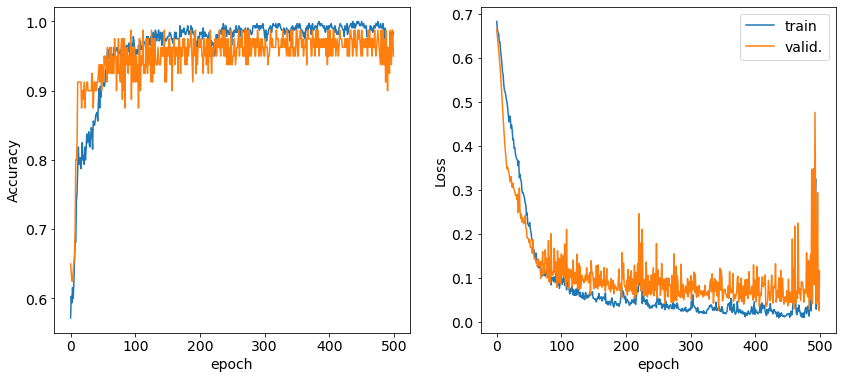

In [195]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('plot_of _increase' + str(N_list.index(N)) + '.png')



In [196]:
import numpy as np
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))

k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])
print(grid)

# RESCALE
print(np.var(X1))
grid_r = (grid/50)*max(x_train[:,0])
print(grid_r)

pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-50. -50.]
 [-48. -50.]
 [-46. -50.]
 ...
 [ 46.  50.]
 [ 48.  50.]
 [ 50.  50.]]
866.6666666666666
[[-1.74316426 -1.74316426]
 [-1.67343769 -1.74316426]
 [-1.60371112 -1.74316426]
 ...
 [ 1.60371112  1.74316426]
 [ 1.67343769  1.74316426]
 [ 1.74316426  1.74316426]]


9


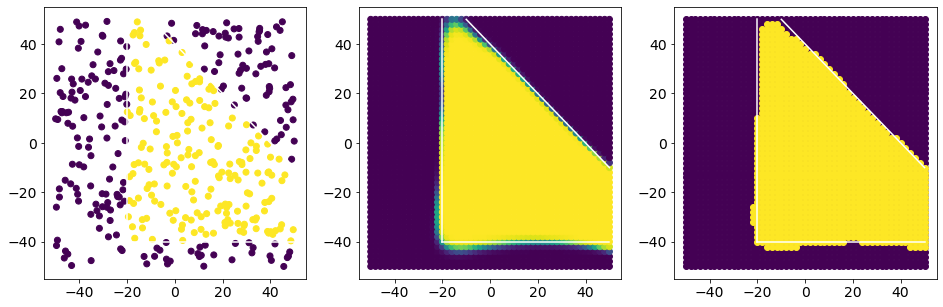

In [197]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")

ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('result_of _increase' + str(N_list.index(N)) + '.png')
print(N_list.index(N))

In [198]:
print("Trainloss",list_of_Trainloss)
print("Validloss",list_of_Validloss)
np.savetxt(filename("Trainloss_increase",TYPE),list_of_Trainloss)
np.savetxt(filename("Validloss_increase",TYPE),list_of_Validloss)

Trainloss [0.02191993221640587, 0.028069941326975822, 0.05485018342733383, 0.01575308106839657, 0.016387246549129486, 0.023071490228176117, 0.02868063375353813, 0.012853596359491348, 0.04034070298075676, 0.032723139971494675]
Validloss [0.013393714092671871, 0.04604007303714752, 0.049353234469890594, 0.05044207349419594, 0.03724546357989311, 0.09227392077445984, 0.029571980237960815, 0.04516755789518356, 0.9916566014289856, 0.11579041182994843]


In [199]:
print("Trainloss_best_epoch",list_of_Trainloss_best_epoch)
print("Validloss_best_epoch",list_of_Validloss_best_epoch)
np.savetxt(filename("Trainloss_increase_best_epoch",TYPE),list_of_Trainloss_best_epoch)
np.savetxt(filename("Validloss_increase_best_epoch",TYPE),list_of_Validloss_best_epoch)


Trainloss_best_epoch [0.017267106100916862, 0.026902267709374428, 0.04038219898939133, 0.04890364035964012, 0.03728044405579567, 0.03321811556816101, 0.06723730266094208, 0.026923606172204018, 0.44909724593162537, 0.06103695183992386]
Validloss_best_epoch [0.012187967076897621, 0.023558009415864944, 0.03614649549126625, 0.03304348886013031, 0.030306978151202202, 0.032726239413022995, 0.023952478542923927, 0.02504810504615307, 0.43597888946533203, 0.05401048809289932]


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

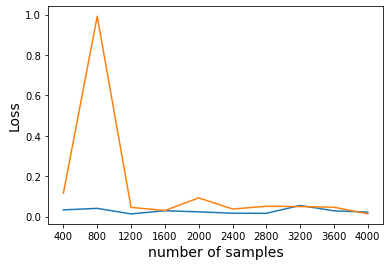

In [200]:
M=list(reversed(N_list))
MM=list(reversed(list_of_Trainloss))
MM2=list(reversed(list_of_Validloss))
NN=[0,1,2,3,4,5,6,7,8,9]
plt.plot(M,MM)
plt.plot(M,MM2)
#plt.show()
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(M,fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig('plot_increase.png')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

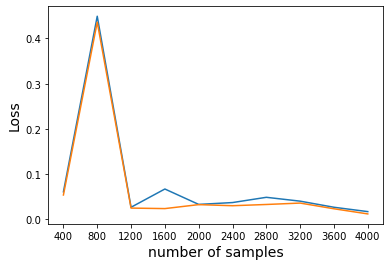

In [201]:
M=list(reversed(N_list))
MM=list(reversed(list_of_Trainloss_best_epoch))
MM2=list(reversed(list_of_Validloss_best_epoch))
NN=[0,1,2,3,4,5,6,7,8,9]
plt.plot(M,MM)
plt.plot(M,MM2)
#plt.show()
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(M,fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig('plot_increase.png')


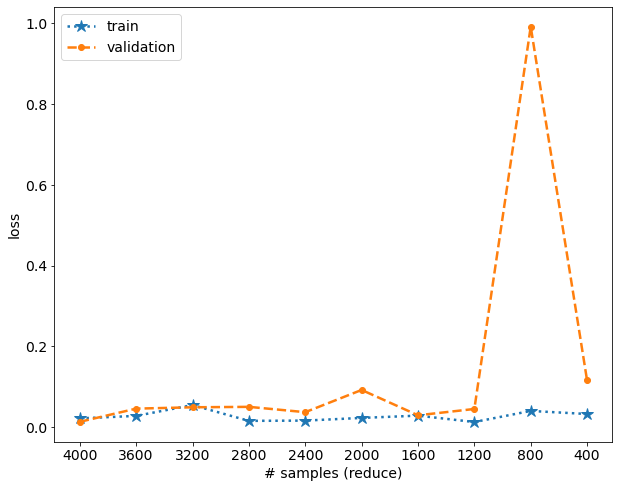

In [202]:
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"
TYPE=1
import numpy as np
import matplotlib.pyplot as plt
N_list=[4000,3600,3200,2800,2400,2000,1600,1200,800,400]
M=[0,1,2,3,4,5,6,7,8,9]
x = np.loadtxt(filename("Trainloss_increase",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase",TYPE), delimiter=' ')
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(M,x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(M,y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (reduce)')
ax.set_ylabel('loss')
ax.set_xticks(M)
ax.set_xticklabels(N_list)


plt.legend(loc = 'best')
plt.savefig('plot_reduce.png')

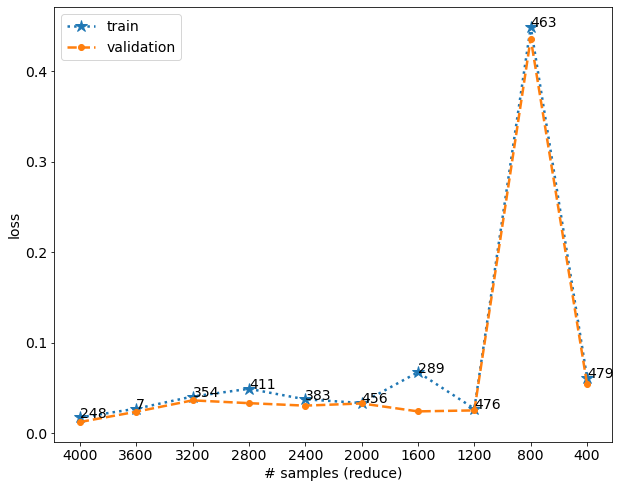

In [203]:
x = np.loadtxt(filename("Trainloss_increase_best_epoch",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase_best_epoch",TYPE), delimiter=' ')
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(M,x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(M,y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (reduce)')
ax.set_ylabel('loss')
ax.set_xticks(M)
ax.set_xticklabels(N_list)
r=list(reversed(list_of_best_index))

for i, txt in enumerate(r):
    ax.annotate(txt, xy = (M[i], list_of_Trainloss_best_epoch[i]))

plt.legend(loc = 'best')
plt.savefig('plot_reduce_best_epoch.png')